<a href="https://colab.research.google.com/github/drbarak/Project2_EDA/blob/main/Project2_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# READ CSV

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

p = print

In [36]:
try:
  df = pd.read_csv('BankChurners.csv')
except:
  from google.colab import files
  uploaded = files.upload()
  df = pd.read_csv('BankChurners.csv')
  
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

## Drop last 2 columns

In [37]:
df.drop(df.columns[-2:], axis=1, inplace=True)
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [38]:
df.rename(columns={'CLIENTNUM': 'Client_num'}, inplace=True)

## change all columns to all lowercase

In [39]:
df.columns = df.columns.str.lower()

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   client_num                10127 non-null  int64  
 1   attrition_flag            10127 non-null  object 
 2   customer_age              10127 non-null  int64  
 3   gender                    10127 non-null  object 
 4   dependent_count           10127 non-null  int64  
 5   education_level           10127 non-null  object 
 6   marital_status            10127 non-null  object 
 7   income_category           10127 non-null  object 
 8   card_category             10127 non-null  object 
 9   months_on_book            10127 non-null  int64  
 10  total_relationship_count  10127 non-null  int64  
 11  months_inactive_12_mon    10127 non-null  int64  
 12  contacts_count_12_mon     10127 non-null  int64  
 13  credit_limit              10127 non-null  float64
 14  total_

In [41]:
df.client_num.nunique()

10127

## Make client_num index

In [42]:
df.set_index('client_num', inplace=True)

In [43]:
df.head()

,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
client_num,,,,,,,,,,,,,,,,,,,,
768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [44]:
df.education_level.value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: education_level, dtype: int64

# There are 1519 unknown education. What do we do with it

## Value_counts for all fields

In [45]:
for c in df.columns:
  p(df[[c]].value_counts())
  print()

attrition_flag   
Existing Customer    8500
Attrited Customer    1627
dtype: int64

customer_age
44              500
49              495
46              490
45              486
47              479
43              473
48              472
50              452
42              426
51              398
53              387
41              379
52              376
40              361
39              333
54              307
38              303
55              279
56              262
37              260
57              223
36              221
35              184
58              157
59              157
34              146
60              127
33              127
32              106
65              101
62               93
61               93
31               91
26               78
30               70
63               65
29               56
64               43
27               32
28               29
67                4
66                2
68                2
70                1
73                1
dty

# Avg_Utilization_Ratio 
It is the ratio of (credit card spent + money withdrawal)/(Total available limit for credit card spends + Total money withdrawal limit)

https://leaps.analyttica.com/sample_cases/11

total_Relationship_Count	Num	Total no. of products held by the customer

Total_Revolving_Bal	Num	Total Revolving Balance on the Credit Card

Looking at the distribution plot of the Months on book there is a weird concentration in 36 months, does any one know a reason for this?

# Is there a relation between 0 for total_revolving_balance and attrition or months_on_book

Is there a relation between non usage of the card to attrition

## Change column Attrition_Flag to 'exists' with 1 for yes and 0 for no (left the card company)

In [46]:
df.rename(columns={'attrition_flag': 'exists'}, inplace=True)
df.columns

Index(['exists', 'customer_age', 'gender', 'dependent_count',
       'education_level', 'marital_status', 'income_category', 'card_category',
       'months_on_book', 'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
       'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt',
       'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio'],
      dtype='object')

In [47]:
df.exists = df['exists'].apply(lambda x: 1 if x == 'Existing Customer' else 0)
df.exists.value_counts()

1    8500
0    1627
Name: exists, dtype: int64

## Change column Gender to 'female' with 1 for yes and 0 for no

In [48]:
df.rename(columns={'gender': 'female'}, inplace=True)
df.female = df['female'].apply(lambda x: 1 if x == 'F' else 0)
df.female.value_counts()

1    5358
0    4769
Name: female, dtype: int64

## Change column customer_age to 'age' 

In [49]:
df.rename(columns={'customer_age': 'age'}, inplace=True)
df.columns

Index(['exists', 'age', 'female', 'dependent_count', 'education_level',
       'marital_status', 'income_category', 'card_category', 'months_on_book',
       'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
       'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt',
       'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio'],
      dtype='object')

## Change column education_level to 'education' and numeric as per table below

In [50]:
eds = ['Unknown', 'Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate','Doctorate']
df.rename(columns={'education_level': 'education'}, inplace=True)
df.education = df['education'].apply(lambda x: eds.index(x))
df.education.value_counts()

4    3128
2    2013
0    1519
1    1487
3    1013
5     516
6     451
Name: education, dtype: int64


```
education_level
Graduate           3128
High School        2013
Unknown            1519
Uneducated         1487
College            1013
Post-Graduate       516
Doctorate           451
```




## Change column marital_status to numeric as per table below



```
marital_status
Married           4687
Single            3943
Unknown            749
Divorced           748

marital_status
Married           2
Single            1
Unknown            0
Divorced           3
```



In [51]:
maritals = ['Unknown', 'Single', 'Married', 'Divorced']
df.marital_status = df['marital_status'].apply(lambda x: maritals.index(x))
df.marital_status.value_counts()

2    4687
1    3943
0     749
3     748
Name: marital_status, dtype: int64

## Change column income_category to numeric as per table below



```
income_category
Less than $40K     3561
$40K - $60K        1790
$80K - $120K       1535
$60K - $80K        1402
Unknown            1112
$120K +             727
```



In [52]:
incs = ['Unknown','Less than $40K', '$40K - $60K', '$80K - $120K', '$60K - $80K', '$120K +']
df.income_category = df['income_category'].apply(lambda x: incs.index(x))
df.income_category.value_counts()

1    3561
2    1790
3    1535
4    1402
0    1112
5     727
Name: income_category, dtype: int64

## Change card_category to 'card' with numeric as per table below



```
card_category
Blue             9436
Silver            555
Gold              116
Platinum           20
```



In [53]:
cards = ['', 'Blue', 'Silver', 'Gold', 'Platinum']
df.rename(columns={'card_category': 'card'}, inplace=True)
df.card = df['card'].apply(lambda x: cards.index(x))
df.card.value_counts()

1    9436
2     555
3     116
4      20
Name: card, dtype: int64

## Verify all fields are numeric

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 768805383 to 714337233
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   exists                    10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   female                    10127 non-null  int64  
 3   dependent_count           10127 non-null  int64  
 4   education                 10127 non-null  int64  
 5   marital_status            10127 non-null  int64  
 6   income_category           10127 non-null  int64  
 7   card                      10127 non-null  int64  
 8   months_on_book            10127 non-null  int64  
 9   total_relationship_count  10127 non-null  int64  
 10  months_inactive_12_mon    10127 non-null  int64  
 11  contacts_count_12_mon     10127 non-null  int64  
 12  credit_limit              10127 non-null  float64
 13  total_revolving_bal       10127 non-null  int64  

# Plot pair relations of all columns

Each plot is too small - need to limit it to few pairs

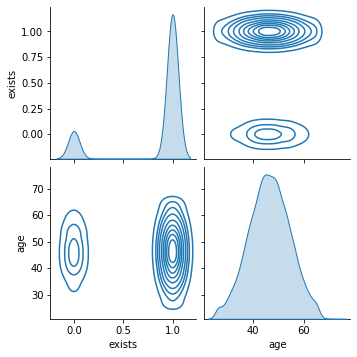

In [62]:
sns.pairplot(data=df, kind='kde', vars=['exists','age'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


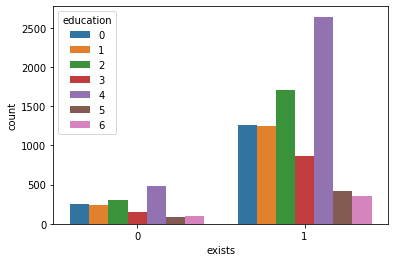

In [59]:
sns.countplot('exists',hue='education',data=df)